In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
import pytesseract
import random as rng

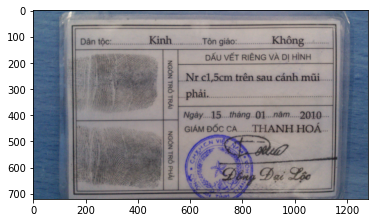

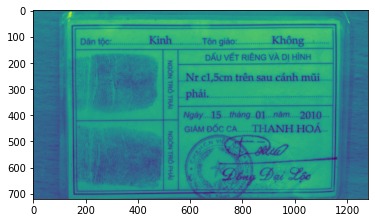

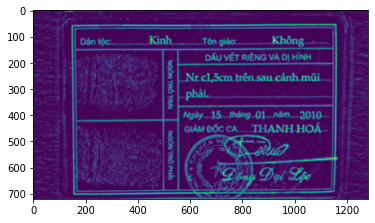

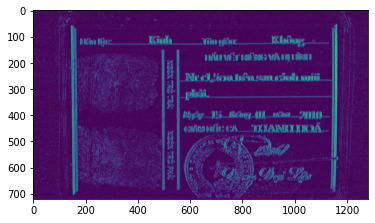

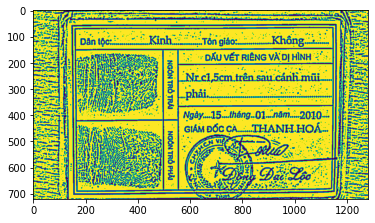

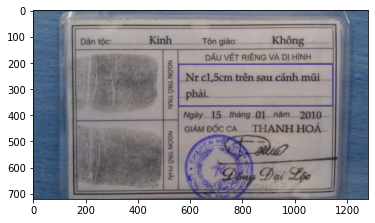

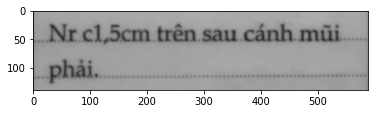

In [155]:

plt.imshow(image)
def extract_characteristics(image):
    image = cv2.resize(image, (1280, 720))
    img= image.copy()
    plt.imshow(image,)
    plt.show()
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (21,21))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    H,W = gray.shape
    plt.imshow(gray)
    plt.show()

    gray = cv2.GaussianBlur(gray, (5,5), 0)
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
    plt.imshow(blackhat)
    plt.show()
    grad = cv2.Sobel(blackhat, ddepth = cv2.CV_32F, dx=1, dy=0, ksize=-1)
    grad = np.absolute(grad)
    (minVal,maxVal)= (np.min(grad), np.max(grad))
    grad = (grad - maxVal)/(maxVal - minVal)
    grad = (grad*255).astype('uint8')
    plt.imshow(grad)
    plt.show()

    # thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    thresh= cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    plt.imshow( thresh)
    plt.show()

    contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(contours)
    Box = []
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        percentWidth = w / float(W)
        percentHeight = h / float(H)
        percent = w / h

        if percent >3 and percent < 6 and percentWidth > 0.3 and percentHeight > .1       :
            Box = ((x, y, w, h))
            color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
            cv2.rectangle(image,(int(x),int(y)),(int(x+w),int(y+h)), color,thickness=3)
    plt.imshow(image)
    plt.show()

    (x, y, w, h) = Box
    # extract the padded MRZ from the image
    box = gray[y+10:y+h-10, x:x+w]
    box = cv2.cvtColor(box, cv2.COLOR_GRAY2BGR)
    plt.imshow(box)
    plt.show()
    text = pytesseract.image_to_string(box, lang = 'vie')
    return box
imagePath='data/cmt_sau.jpg'
image_back = cv2.imread(imagePath)
characteristics=extract_characteristics(image_back)

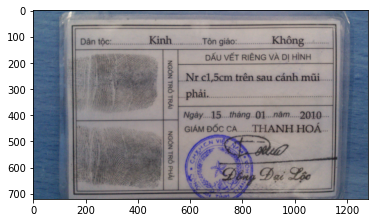

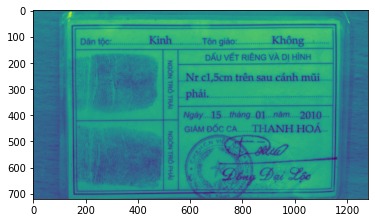

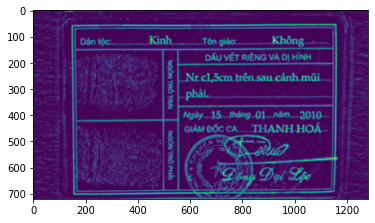

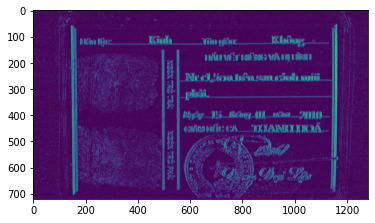

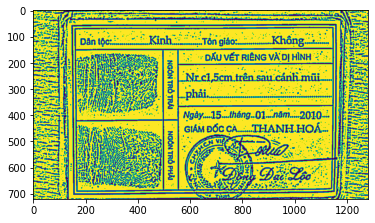

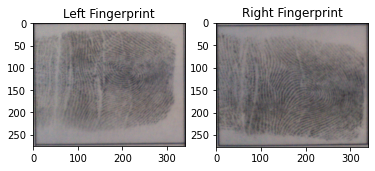

In [151]:
def extract_fingerprint(image):
    image = cv2.resize(image, (1280, 720))
    img= image.copy()
    plt.imshow(image,)
    plt.show()
    kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (21,21))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    H,W = gray.shape
    plt.imshow(gray)
    plt.show()

    gray = cv2.GaussianBlur(gray, (5,5), 0)
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
    plt.imshow(blackhat)
    plt.show()
    grad = cv2.Sobel(blackhat, ddepth = cv2.CV_32F, dx=1, dy=0, ksize=-1)
    grad = np.absolute(grad)
    (minVal,maxVal)= (np.min(grad), np.max(grad))
    grad = (grad - maxVal)/(maxVal - minVal)
    grad = (grad*255).astype('uint8')
    plt.imshow(grad)
    plt.show()

    # thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    thresh= cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    plt.imshow( thresh)
    plt.show()

    contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(contours)
    Box = []
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        percentWidth = w / float(W)
        percentHeight = h / float(H)
        percent = w / h
        if percent >1 and percent < 1.5 and percentWidth > 0.15 and percentHeight > .2       :
            Box.append((x, y, w, h))
            color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
            cv2.rectangle(image,(int(x),int(y)),(int(x+w),int(y+h)), color,thickness=3)
    (x1, y1, w1, h1) = Box[0]
    (x2, y2, w2, h2) = Box[1]
    if y1 >y2:
        left_finger = img[y2-5:y2+h2+5, x2-5:x2+w2+5]
        right_finger = img[y1-5:y1+h1+5, x1-5:x1+w1+5]
    else:
        right_finger = image[y2-5:y2+h2+5, x2-5:x2+w2+5]
        left_finger = img[y1-5:y1+h1+5, x1-5:x1+w1+5]
        
    fig = plt.figure(figsize=(6,10))
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(left_finger)
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(right_finger)
    ax1.title.set_text('Left Fingerprint')
    ax2.title.set_text('Right Fingerprint')
    return left_finger , right_finger
imagePath='data/cmt_sau.jpg'
image_back = cv2.imread(imagePath)
left_finger , right_finger = extract_fingerprint(image_back)

1 sau đuôi

 



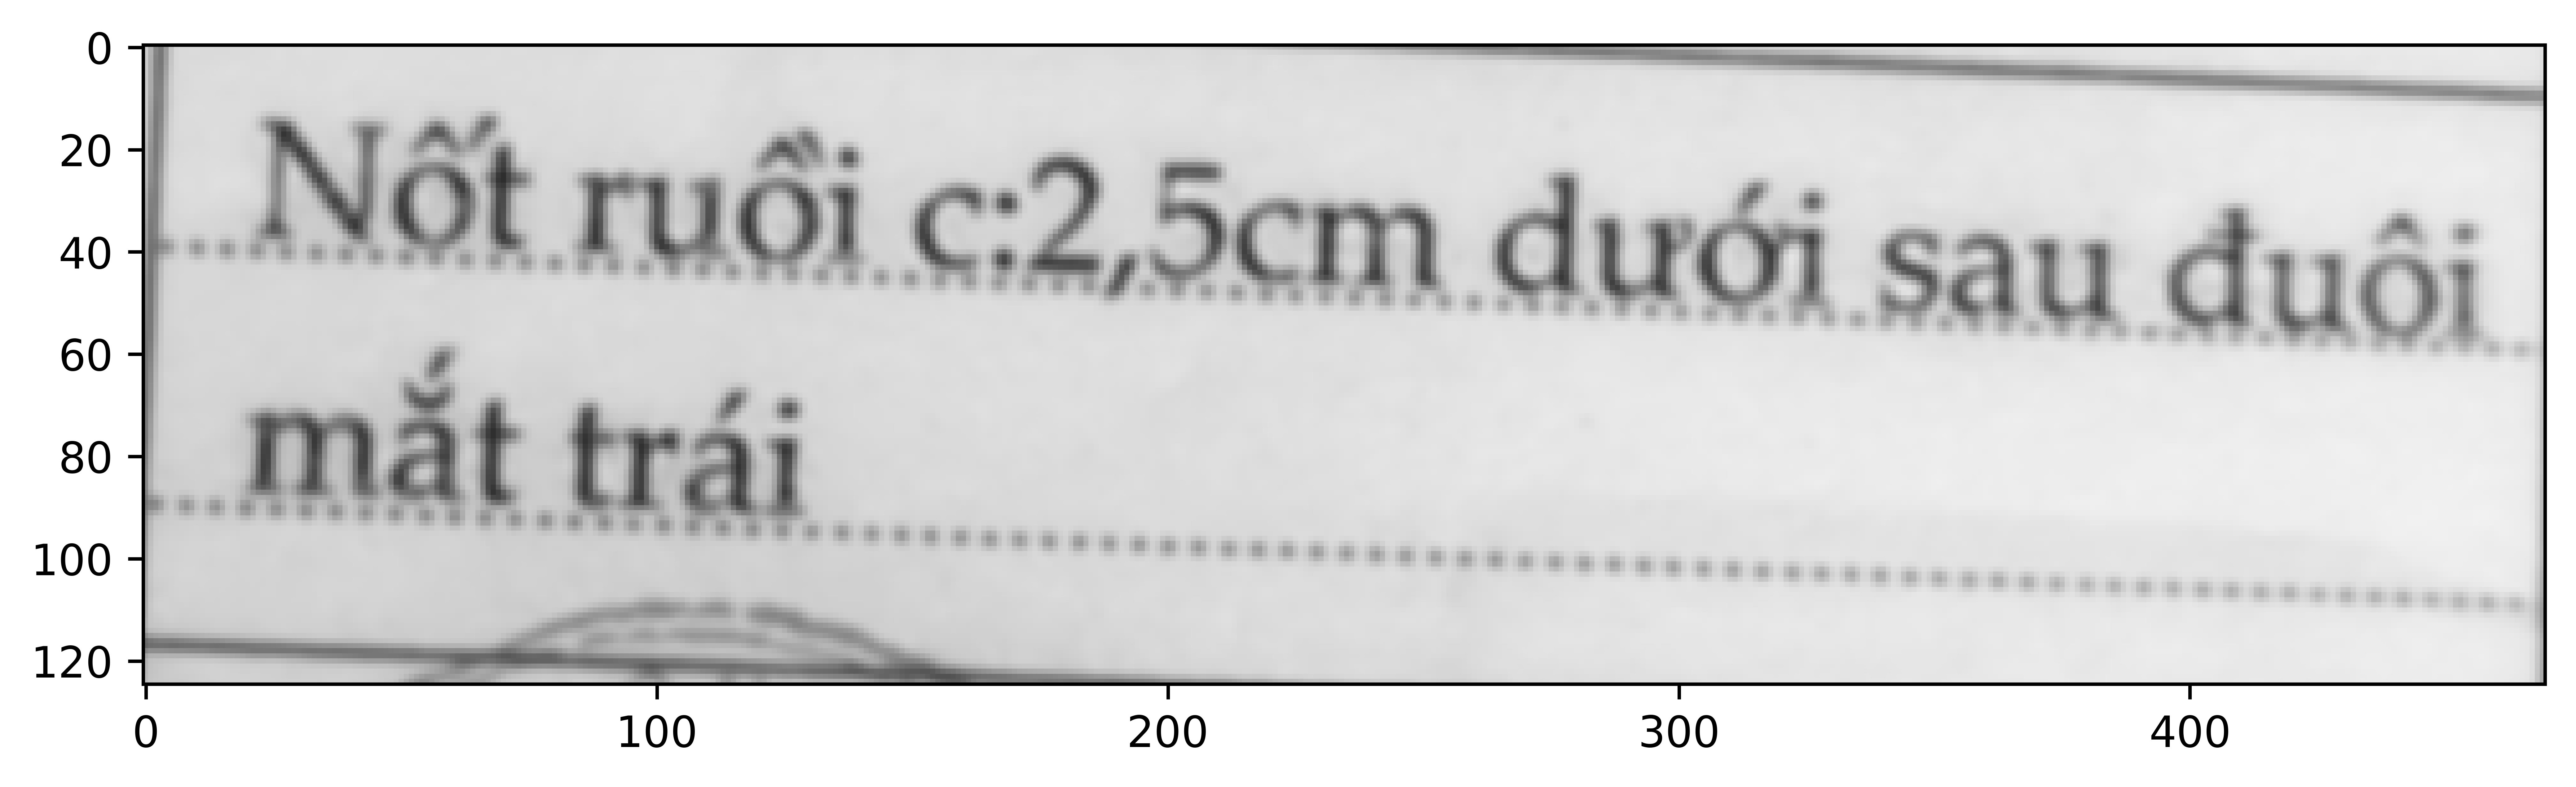

In [121]:
tv_img = cv2.imread('./data/tv.png')
tv_img = box
plt.figure(figsize=(10,5), dpi= 1000)
plt.imshow(tv_img)
tv_txt = pytesseract.image_to_string(tv_img, lang= 'vie')
print(tv_txt)

In [123]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer
from vietocr.tool.predictor import Predictor
config = Cfg.load_config_from_name('vgg_seq2seq')
config['weights'] = 'https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False
detector_vietocr = Predictor(config)


File exists: /home/huy/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4


In [124]:
from ocr import * 
import streamlit as st
import time

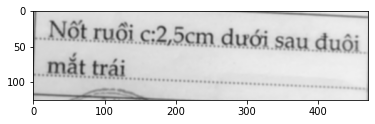

In [125]:
plt.imshow(box)
from PIL import Image
img_box=Image.fromarray(box)
s = detector.predict(img_box)


In [126]:
def ocr_doctr(image):
    model_doctr = detection_predictor(arch='db_resnet50', pretrained=True,assume_straight_pages=True)
#     doct_img=DocumentFile.from_images(image)
    
#     if isinstance(file, (str, Path)):
#         if not Path(file).is_file():
#             raise FileNotFoundError(f"unable to access {file}")
#         img = cv2.imread(str(file), cv2.IMREAD_COLOR)
#     elif isinstance(file, bytes):
#         file = np.frombuffer(file, np.uint8)
#         img = cv2.imdecode(file, cv2.IMREAD_COLOR)
#     else:
#         raise TypeError("unsupported object type for argument 'file'")
#     print(doct_img)
    doct_img=[image]
    result=model_doctr(doct_img)
    img_copy=doct_img[0].copy()
    h,w,c=doct_img[0].shape
    bboxes=[]
    for box in result[0]:
        x1=int(box[0]*w)
        y1=int(box[1]*h)
        x2=int(box[2]*w)
        y2=int(box[3]*h)
        # bboxes.append([x1,x2,y1,y2])
        bboxes.insert(0,[x1,x2,y1,y2])
        img_copy=bounding_box(x1,y1,x2,y2,img_copy)
    plt.imshow(img_copy)
    plt.show()
#     st.image(img_copy, caption='Boxed_image')
    a=time.time()
    raw_text=Vietocr_img(img_copy,bboxes,detector_vietocr)
    b=time.time()
#     st.write(f"Vietocr: {b-a}")
    
    g=arrange_bbox(bboxes)
    rows = arrange_row(g= g)

    for row in rows:
        x=""
        for i in row:
            x=x+" "+raw_text[i]
        st.write(x)

    return bboxes,raw_text,h,w

INFO:root:Using downloaded & verified file: /home/huy/.cache/doctr/models/db_resnet50-adcafc63.zip
2022-06-06 15:24:11.154 Using downloaded & verified file: /home/huy/.cache/doctr/models/db_resnet50-adcafc63.zip


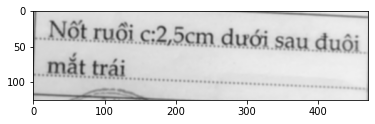

([], [], 125, 470)

In [129]:
bboxes,raw_text,h,w=ocr_doctr(box)
bboxes,raw_text,h,w

In [132]:
pytesseract.image_to_string(box, lang='vie')

'1 sau đuôi\n\n \n\x0c'

In [98]:
bx,by,bw,bh=Box
bx,by,bw,bh

(563, 279, 470, 145)

In [108]:
ddbox=[]
idx = []
for i,box in enumerate(bboxes):
    x1,x2,y1,y2= box
    print(x1,y1,x2,y2 )
    if x1 >bx and y1>by and x2<bx+bw and y2<by+bh:
        ddbox.append(box)
        idx.append(i)

257 177 318 206
315 180 372 209
461 181 550 215
635 199 695 227
691 201 762 232
836 201 951 244
645 244 765 279
757 251 842 279
841 255 881 280
881 259 910 279
908 258 975 280
622 296 718 338
577 299 648 334
582 313 593 321
708 308 821 341
821 311 900 343
950 315 1032 351
895 320 956 347
640 351 698 385
572 353 645 383
610 412 655 423
652 412 696 422
692 413 707 420
702 428 792 454
793 427 922 459
663 433 707 448
927 433 1005 462
640 463 706 495
567 464 645 492
746 465 857 501
707 472 743 491
833 466 1006 506
766 606 872 664
592 601 775 674
838 604 970 669
847 623 858 632
